# collecting data

## another free [API key](86K8II5DX6B0I3BT)

FIRST OF ALL, you need a APIKEY from [website](https://www.alphavantage.co/support/#api-key)

In [ ]:
import pandas as pd

In [ ]:
names = pd.read_csv("fundamental.csv")
names.head(3)

,Name,Symbol,Market Cap,Revenue,Average Volume (3m),EPS,P/E Ratio,Beta,Dividend,Yield
0,Qualcomm Incorporated,QCOM.O,"165,660,000,000","36,040,000,000","11,174,558",8.73,17.51,1.20,2.72,1.78%
1,Tesla Inc,TSLA.O,1.12T,"53,820,000,000","26,651,773",4.92,218.95,2.08,-,-
2,NVIDIA Corporation,NVDA.O,"669,400,000,000","26,910,000,000","52,702,837",3.85,70.96,1.42,0.16,0.06%


In [ ]:
tickers = names['Symbol'].map(lambda x: str(x)[:-2])
tickers.head(3)

0    QCOM
1    TSLA
2    NVDA
Name: Symbol, dtype: object

In [ ]:
tickers

alphavintage free API only allow 5 retreval of stocks. so each time need to updae the index of Symbols.

In [ ]:
stocks_tickers = names[['Name', 'Symbol']]
stocks_tickers['Symbol']= stocks_tickers['Symbol'].map(lambda x: str(x)[:-2])

<ipython-input-4-cdd3991241ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_tickers['Symbol']= stocks_tickers['Symbol'].map(lambda x: str(x)[:-2])


In [ ]:
import pandas as pd
# names = pd.read_csv("fundamental.csv", delimiter=',')
names = pd.read_csv("fundamental.csv")
tickers = names['Symbol'].map(lambda x: str(x)[:-2])
tickers.head(3)

0    QCOM
1    TSLA
2    NVDA
Name: Symbol, dtype: object

#alphavintage

##### code for get the stocks data of alphavintage

first you need apply a API KEY

In [ ]:
import pandas as pd
YOURAPI = SOMEKEY
def call_alphavintage(indx, append_alphafinance, ticket):
   for index in range(len(ticket)):
     item = ticket[index]
     if index > indx:
        print(item)
        # url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&outputsize=full&symbol='+item+'&apikey=[YOURAPI-REPLACEHERE]&datatype=csv'
        # replace your key
        url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&outputsize=full&symbol='+item+'&apikey=[YOURAPI-REPLACEHERE]&datatype=csv'
        webFile = request.urlopen(url).read()
        # webFile = webFile.decode('utf-8')

        c=pd.read_csv(io.StringIO(webFile.decode('utf-8')))
        append_alphafinance[item] = c['adjusted_close'][320:1079]  #only workday has transaction so three years, 759 transaction days
   append_alphafinance.insert(loc = 0, column = 'Date', value = c['timestamp'][320:1079])

In [ ]:
import urllib
import io
from urllib import request

In [ ]:
next = 0
stocks_alphafinance = pd.DataFrame()

In [ ]:
call_alphavintage(next, stocks_alphafinance, tickers)
stocks_alphafinance

CCMP
MGIC
LOGI
APWC
SWKS


,Date,TSLA,NVDA,TAIT,INTC,AUDC,CSCO,MSFT,AAPL,ALOT,...,CDK,WDC,ATVI,MKSI,TER,CCMP,MGIC,LOGI,APWC,SWKS
320,2022-04-01,361.530000,266.847430,3.542544,45.863083,24.883559,53.053715,305.711646,173.020763,15.110000,...,53.626899,48.390000,80.342617,139.667709,115.701293,183.516406,16.855109,69.902644,1.8100,128.188645
321,2022-03-31,359.200000,272.581573,3.588432,47.245363,25.089777,53.149033,304.614950,173.318544,15.170000,...,53.548210,49.650000,79.636810,148.361704,117.550605,187.874550,16.576114,72.192288,1.8200,129.402277
322,2022-03-30,364.663333,276.617450,3.588432,49.028027,25.168336,53.425453,310.098434,176.455172,15.000000,...,53.371158,50.620000,79.885334,154.751149,120.334515,189.040674,17.095621,74.658059,1.8200,132.431502
323,2022-03-29,366.523333,286.267593,3.505834,49.809730,25.885186,53.063247,311.629857,177.636371,15.140000,...,53.233452,51.890000,80.273030,161.931855,124.649575,186.649131,17.393856,76.360615,1.8900,136.208324
324,2022-03-28,363.946667,281.902053,3.570077,49.104291,25.462932,52.558064,306.976306,174.301222,15.210000,...,53.135090,50.700000,79.537401,154.355517,122.253424,184.544177,17.191826,75.842020,1.8899,133.072300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,2019-04-05,18.330667,47.423780,2.317337,49.146719,14.837462,48.491983,114.788582,47.596980,23.731947,...,61.984507,49.984252,46.482097,95.967869,43.272646,99.766342,7.907007,38.386922,2.2900,80.403363
1075,2019-04-04,17.852000,46.755700,2.341476,49.429578,14.561991,48.430501,114.281134,47.280472,23.251821,...,62.601410,49.369534,46.157735,95.047709,42.762979,106.433215,7.772686,38.244396,2.2900,79.208428
1076,2019-04-03,19.454000,46.845108,2.405846,49.040647,14.770969,48.552690,114.865178,47.198325,22.879478,...,62.297704,49.955437,46.835947,95.473888,42.733575,106.878304,7.647320,38.358416,2.3000,79.069482
1077,2019-04-02,19.058667,45.449342,2.389754,48.050641,14.903955,48.255945,114.118368,46.876985,20.890384,...,61.823163,48.389828,46.649193,91.822305,41.184973,105.874485,7.593592,37.816819,2.3000,77.957915


In [ ]:
stocks_alphafinance

,Date,TSLA,NVDA,TAIT,INTC,AUDC,CSCO,MSFT,AAPL,ALOT,...,CCMP,MGIC,LOGI,APWC,SWKS,SPNS,ADI,QCOM,ESLT,OLED
320,2022-04-01,361.530000,266.847430,3.542544,45.863083,24.883559,53.053715,305.711646,173.020763,15.110000,...,183.516406,16.855109,69.902644,1.8100,128.188645,24.851489,161.540436,142.648198,216.597185,165.200592
321,2022-03-31,359.200000,272.581573,3.588432,47.245363,25.089777,53.149033,304.614950,173.318544,15.170000,...,187.874550,16.576114,72.192288,1.8200,129.402277,24.352733,161.364594,148.305991,217.069825,164.766347
322,2022-03-30,364.663333,276.617450,3.588432,49.028027,25.168336,53.425453,310.098434,176.455172,15.000000,...,189.040674,17.095621,74.658059,1.8200,132.431502,24.582928,162.634566,148.218649,222.121166,167.401424
323,2022-03-29,366.523333,286.267593,3.505834,49.809730,25.885186,53.063247,311.629857,177.636371,15.140000,...,186.649131,17.393856,76.360615,1.8900,136.208324,25.331062,166.249101,156.312302,214.263524,173.253862
324,2022-03-28,363.946667,281.902053,3.570077,49.104291,25.462932,52.558064,306.976306,174.301222,15.210000,...,184.544177,17.191826,75.842020,1.8899,133.072300,24.439056,163.396549,153.769691,233.188822,167.509986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,2019-04-05,18.330667,47.423780,2.317337,49.146719,14.837462,48.491983,114.788582,47.596980,23.731947,...,99.766342,7.907007,38.386922,2.2900,80.403363,14.239534,102.802635,52.378047,130.170347,159.979335
1075,2019-04-04,17.852000,46.755700,2.341476,49.429578,14.561991,48.430501,114.281134,47.280472,23.251821,...,106.433215,7.772686,38.244396,2.2900,79.208428,13.969282,101.954094,52.260628,127.199378,159.481686
1076,2019-04-03,19.454000,46.845108,2.405846,49.040647,14.770969,48.552690,114.865178,47.198325,22.879478,...,106.878304,7.647320,38.358416,2.3000,79.069482,14.332725,101.308464,52.098047,127.618361,161.306397
1077,2019-04-02,19.058667,45.449342,2.389754,48.050641,14.903955,48.255945,114.118368,46.876985,20.890384,...,105.874485,7.593592,37.816819,2.3000,77.957915,14.435235,99.712838,52.468370,128.246835,155.929842


In [ ]:
stocks_alphafinance.to_csv('alphavintage_stock.csv')

In [ ]:
# stocks_alphafinance.insert(loc = 0, column = 'Date', value = c['timestamp'][320:1079])

In [ ]:
next = next + 6

In [ ]:
next = next + 5  # every time retrive next

In [ ]:
stocks_alphafinance.columns

Index(['Date', 'TSLA', 'NVDA', 'TAIT', 'INTC', 'AUDC', 'CSCO', 'MSFT', 'AAPL',
       'ALOT', 'GRMN', 'TXN', 'EQIX', 'CDW', 'AVGO', 'INTU', 'BRKR', 'IDCC',
       'MNDO', 'EBIX', 'CDK', 'WDC', 'ATVI', 'MKSI', 'TER', 'CCMP', 'MGIC',
       'LOGI', 'APWC', 'SWKS', 'SPNS', 'ADI', 'QCOM', 'ESLT', 'OLED'],
      dtype='object')

In [ ]:
lefttickers = set(tickers) -set(stocks_alphafinance.columns)
lefttickers

{'WSTG'}

In [ ]:
   leftt = list(lefttickers)
   for index in range(len(leftt)):
     item = leftt[index]
     if index > -1:
        print(item)
        # url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&outputsize=full&symbol='+item+'&apikey=[YOURAPIKEY]&datatype=csv'
        url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&outputsize=full&symbol='+item+'&apikey=[YOURAPIKEY]&datatype=csv'
        webFile = request.urlopen(url).read()
        # webFile = webFile.decode('utf-8')

        c=pd.read_csv(io.StringIO(webFile.decode('utf-8')))
        stocks_alphafinance[item] = c['adjusted_close'][320:1078]  #only workday has transaction so three years, 759 transaction days
   stocks_alphafinance.insert(loc = 0, column = 'Date', value = c['timestamp'][320:1079])

In [ ]:
stocks_alphafinance.insert(loc = 0, column = 'Date', value = c['timestamp'][:759])

In [ ]:
stocks_alphafinance.head()

In [ ]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&outputsize=full&symbol='+'AAPL'+'&apikey=[YOURAPIKEY]&datatype=csv'

In [ ]:
webFile = request.urlopen(url).read()
c=pd.read_csv(io.StringIO(webFile.decode('utf-8')))

In [ ]:
c

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
0,2023-07-13,190.50,191.19,189.780,190.54,190.540000,41342338,0.0,1.0
1,2023-07-12,189.68,191.70,188.470,189.77,189.770000,60750248,0.0,1.0
2,2023-07-11,189.16,189.30,186.600,188.08,188.080000,46638119,0.0,1.0
3,2023-07-10,189.26,189.99,187.035,188.61,188.610000,59922163,0.0,1.0
4,2023-07-07,191.41,192.67,190.240,190.68,190.680000,46814998,0.0,1.0
...,...,...,...,...,...,...,...,...,...
5957,1999-11-05,84.62,88.37,84.000,88.31,0.670080,3721500,0.0,1.0
5958,1999-11-04,82.06,85.37,80.620,83.62,0.634493,3384700,0.0,1.0
5959,1999-11-03,81.62,83.25,81.000,81.50,0.618407,2932700,0.0,1.0
5960,1999-11-02,78.00,81.69,77.310,80.25,0.608922,3564600,0.0,1.0


In [ ]:
pd.to_datetime('2022-04-01')

Timestamp('2022-04-01 00:00:00')

In [ ]:
c[c['timestamp']=='2022-04-01' ]

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
320,2022-04-01,174.03,174.88,171.94,174.31,173.020763,78751328,0.0,1.0


In [ ]:
c[c['timestamp']=='2019-04-01' ]

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
1078,2019-04-01,191.64,191.68,188.38,191.24,46.205312,27861964,0.0,1.0


In [ ]:
c.loc[320:1078,:]

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
320,2022-04-01,174.03,174.88,171.94,174.31,173.020763,78751328,0.0,1.0
321,2022-03-31,177.84,178.03,174.40,174.61,173.318544,103049285,0.0,1.0
322,2022-03-30,178.55,179.61,176.70,177.77,176.455172,92633154,0.0,1.0
323,2022-03-29,176.69,179.01,176.34,178.96,177.636371,100589440,0.0,1.0
324,2022-03-28,172.17,175.73,172.00,175.60,174.301222,90371916,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1074,2019-04-05,196.45,197.10,195.93,197.00,47.596980,18526644,0.0,1.0
1075,2019-04-04,194.79,196.37,193.14,195.69,47.280472,19114275,0.0,1.0
1076,2019-04-03,193.25,196.50,193.15,195.35,47.198325,23271830,0.0,1.0
1077,2019-04-02,191.09,194.46,191.05,194.02,46.876985,22765732,0.0,1.0


# upload the downloded file

In [ ]:
import pandas as pd
# names = pd.read_csv("fundamental.csv", delimiter=',')
alphavintage_stock = pd.read_csv("/content/alphavintage_stock.csv")
alphavintage_stock.head()

,Unnamed: 0,Date,TSLA,NVDA,TAIT,INTC,AUDC,CSCO,MSFT,AAPL,...,CCMP,MGIC,LOGI,APWC,SWKS,SPNS,ADI,QCOM,ESLT,OLED
0,320,2022-04-01,361.530000,266.847430,3.542544,45.863083,24.883559,53.053715,305.711646,173.020763,...,183.516406,16.855109,69.902644,1.8100,128.188645,24.851489,161.540436,142.648198,216.597185,165.200592
1,321,2022-03-31,359.200000,272.581573,3.588432,47.245363,25.089777,53.149033,304.614950,173.318544,...,187.874550,16.576114,72.192288,1.8200,129.402277,24.352733,161.364594,148.305991,217.069825,164.766347
2,322,2022-03-30,364.663333,276.617450,3.588432,49.028027,25.168336,53.425453,310.098434,176.455172,...,189.040674,17.095621,74.658059,1.8200,132.431502,24.582928,162.634566,148.218649,222.121166,167.401424
3,323,2022-03-29,366.523333,286.267593,3.505834,49.809730,25.885186,53.063247,311.629857,177.636371,...,186.649131,17.393856,76.360615,1.8900,136.208324,25.331062,166.249101,156.312302,214.263524,173.253862
4,324,2022-03-28,363.946667,281.902053,3.570077,49.104291,25.462932,52.558064,306.976306,174.301222,...,184.544177,17.191826,75.842020,1.8899,133.072300,24.439056,163.396549,153.769691,233.188822,167.509986


In [ ]:
yahoofinance_stock = pd.read_csv("/content/stocks_yahoofinance.csv")
yahoofinance_stock.head()

,Date,QCOM,TSLA,NVDA,TAIT,INTC,AUDC,OLED,CSCO,MSFT,...,WDC,ATVI,MKSI,TER,ADI,CCMP,MGIC,LOGI,APWC,SWKS
0,2019-04-01,53.770355,57.835999,45.317345,2.367147,50.518963,13.330134,156.589127,50.312611,115.344635,...,47.321392,46.586555,92.487579,41.185242,102.273117,110.900810,7.820644,38.184750,2.31,80.005554
1,2019-04-02,54.030785,57.175999,45.496338,2.603862,50.379951,14.677180,158.013031,50.596294,115.509392,...,48.348240,46.922707,92.849976,41.421825,102.112541,110.092583,7.802242,38.319538,2.30,80.291756
2,2019-04-03,53.649437,58.362000,46.893555,2.621396,51.417953,14.546219,163.461426,50.907436,116.265312,...,49.912498,47.110558,96.542419,42.979328,103.746574,114.864975,7.857448,38.868336,2.30,81.436592
3,2019-04-04,53.816864,53.556000,46.804058,2.551259,51.825729,14.340421,161.612350,50.778503,115.674149,...,49.327106,46.428368,96.111473,43.008900,104.407738,114.643692,7.986259,38.752808,2.29,81.579697
4,2019-04-05,53.937771,54.992001,47.472820,2.524957,51.529160,14.611700,162.116608,50.842960,116.187767,...,49.941296,46.754635,97.041931,43.521503,105.276688,116.673897,8.124269,38.897228,2.29,82.810417


In [ ]:
alphavintage_stock = alphavintage_stock.drop(['Unnamed: 0'], axis=1)


In [ ]:
alphavintage_stock = alphavintage_stock.iloc[::-1]

In [ ]:
import numpy as np

alphavintage_stock.index = np.arange(len(alphavintage_stock))

In [ ]:
alphavintage_stock.head()

,Date,TSLA,NVDA,TAIT,INTC,AUDC,CSCO,MSFT,AAPL,ALOT,...,CCMP,MGIC,LOGI,APWC,SWKS,SPNS,ADI,QCOM,ESLT,OLED
0,2019-04-01,19.278667,45.270525,2.172503,48.183231,13.536097,47.985384,113.955601,46.205312,21.086354,...,105.372576,7.611501,37.683795,2.31,77.680023,NaN,NaN,NaN,NaN,NaN
1,2019-04-02,19.058667,45.449342,2.389754,48.050641,14.903955,48.255945,114.118368,46.876985,20.890384,...,105.874485,7.593592,37.816819,2.30,77.957915,14.435235,99.712838,52.468370,128.246835,155.929842
2,2019-04-03,19.454000,46.845108,2.405846,49.040647,14.770969,48.552690,114.865178,47.198325,22.879478,...,106.878304,7.647320,38.358416,2.30,79.069482,14.332725,101.308464,52.098047,127.618361,161.306397
3,2019-04-04,17.852000,46.755700,2.341476,49.429578,14.561991,48.430501,114.281134,47.280472,23.251821,...,106.433215,7.772686,38.244396,2.29,79.208428,13.969282,101.954094,52.260628,127.199378,159.481686
4,2019-04-05,18.330667,47.423780,2.317337,49.146719,14.837462,48.491983,114.788582,47.596980,23.731947,...,99.766342,7.907007,38.386922,2.29,80.403363,14.239534,102.802635,52.378047,130.170347,159.979335


In [ ]:
len(alphavintage_stock)

759

# get IRX AND GSPC

# [here is the link to the documents](https://cafim.sssup.it/~giulio/other/alpha_vantage/index.html)
[Yahoo list of stickers](https://investexcel.net/all-yahoo-finance-stock-tickers/)

In [ ]:
import urllib
import io
from urllib import request

In [ ]:
url = 'https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords=S&P500&apikey=[YOURAPIKEY]'
# r = request.get(url)
# data = r.json()
webFile = request.urlopen(url).read()
# c=pd.read_csv(io.StringIO(webFile.decode('utf-8')))
print(webFile)

b'{\n    "bestMatches": [\n        {\n            "1. symbol": "S",\n            "2. name": "SentinelOne Inc - Class A",\n            "3. type": "Equity",\n            "4. region": "United States",\n            "5. marketOpen": "09:30",\n            "6. marketClose": "16:00",\n            "7. timezone": "UTC-04",\n            "8. currency": "USD",\n            "9. matchScore": "1.0000"\n        },\n        {\n            "1. symbol": "S.TRT",\n            "2. name": "Sherritt International Corporation",\n            "3. type": "Equity",\n            "4. region": "Toronto",\n            "5. marketOpen": "09:30",\n            "6. marketClose": "16:00",\n            "7. timezone": "UTC-05",\n            "8. currency": "CAD",\n            "9. matchScore": "0.4000"\n        },\n        {\n            "1. symbol": "S00.FRK",\n            "2. name": "Spire Healthcare Group plc",\n            "3. type": "Equity",\n            "4. region": "Frankfurt",\n            "5. marketOpen": "08:00",\n  

In [ ]:
url = 'https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords=GSPC&apikey=[YOURAPIKEY]'
# r = request.get(url)
# data = r.json()
webFile = request.urlopen(url).read()
# c=pd.read_csv(io.StringIO(webFile.decode('utf-8')))
print(webFile)

b'{\n    "bestMatches": [\n        {\n            "1. symbol": "GSPCX",\n            "2. name": "Goldman Sachs Large Cap Core Fd USD Class C",\n            "3. type": "Mutual Fund",\n            "4. region": "United States",\n            "5. marketOpen": "09:30",\n            "6. marketClose": "16:00",\n            "7. timezone": "UTC-04",\n            "8. currency": "USD",\n            "9. matchScore": "0.8889"\n        }\n    ]\n}'


In [ ]:
c=pd.read_csv(io.StringIO(webFile.decode('utf-8')))
c

In [ ]:
item = 'IRX'
url = 'https://www.alphavantage.co/query?function=TREASURY_YIELD&interval=daily&maturity=13week&apikey=[YOURAPIKEY]&datatype=csv'
webFile = request.urlopen(url).read()
c=pd.read_csv(io.StringIO(webFile.decode('utf-8')))


In [ ]:
webFile

In [ ]:
c

,timestamp,value
0,2023-07-26,3.86
1,2023-07-25,3.91
2,2023-07-24,3.86
3,2023-07-21,3.84
4,2023-07-20,3.85
...,...,...
16057,1962-01-08,4.03
16058,1962-01-05,4.02
16059,1962-01-04,3.99
16060,1962-01-03,4.03


In [ ]:
item = 'SPY'
# url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&outputsize=full&symbol='+item+'&apikey=[YOURAPIKEY]&datatype=csv'
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&outputsize=full&symbol='+item+'&apikey=[YOURAPIKEY]&datatype=csv'
webFile = request.urlopen(url).read()
c=pd.read_csv(io.StringIO(webFile.decode('utf-8')))
c

,timestamp,open,high,low,close,volume
0,2023-07-27,459.0200,459.4400,451.5500,452.4900,92194375
1,2023-07-26,454.4700,456.9900,453.3800,455.5100,71052885
2,2023-07-25,453.9200,456.7350,453.8700,455.4400,55191240
3,2023-07-24,453.3700,455.0400,452.2980,454.2000,54023382
4,2023-07-21,453.9600,454.1650,452.1700,452.1800,71275618
...,...,...,...,...,...,...
5967,1999-11-05,138.6250,139.1093,136.7812,137.8750,7431500
5968,1999-11-04,136.7500,137.3593,135.7656,136.5312,7907500
5969,1999-11-03,136.0000,136.3750,135.1250,135.5000,7222300
5970,1999-11-02,135.9687,137.2500,134.5937,134.5937,6516900


In [ ]:
item = 'SPY'
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&outputsize=full&symbol='+item+'&apikey=[YOURAPIKEY]&datatype=csv'
# url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&outputsize=full&symbol='+item+'&apikey=[YOURAPIKEY]&datatype=csv'
webFile = request.urlopen(url).read()
c=pd.read_csv(io.StringIO(webFile.decode('utf-8')))
c

,{
0,"""Information"": ""Thank you for using Alpha ..."
1,}


In [ ]:
webFile

b'{\n    "Information": "Thank you for using Alpha Vantage! This is a premium endpoint. You may subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly unlock all premium endpoints"\n}'

In [ ]:
item = 'SPX'
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&outputsize=full&symbol='+item+'&apikey=[YOURAPIKEY]&datatype=csv'
webFile = request.urlopen(url).read()
c=pd.read_csv(io.StringIO(webFile.decode('utf-8')))

In [ ]:
item = '^GSPC'
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&outputsize=full&symbol='+item+'&apikey=[YOURAPIKEY]&datatype=csv'
# url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&outputsize=full&symbol='+item+'&apikey=[YOURAPIKEY]&datatype=csv'
webFile = request.urlopen(url).read()
c=pd.read_csv(io.StringIO(webFile.decode('utf-8')))
c

,{}


In [ ]:
webFile

b'{}'

In [ ]:
item = 'SNP'
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&outputsize=full&symbol='+item+'&apikey=[YOURAPIKEY]&datatype=csv'
webFile = request.urlopen(url).read()
c=pd.read_csv(io.StringIO(webFile.decode('utf-8')))

In [ ]:
webFile

b'{\n    "Information": "Thank you for using Alpha Vantage! This is a premium endpoint. You may subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly unlock all premium endpoints"\n}'

In [ ]:
tbill = pd.DataFrame()
tbill['^IRX']= c.loc[333:1117,:]['value']

In [ ]:
tbill

# yahoo GSPC

In [ ]:
from functools import reduce
from operator import mul
import pandas as pd
import yfinance as yf
import datetime
import time
import requests
import io

In [ ]:
start = datetime.datetime(2019,4,1)
end = datetime.datetime(2022,4,2)

In [ ]:
stock2 = yf.download('^GSPC',start=start, end=end, progress=False)['Adj Close']
# stock2
market = pd.DataFrame()
market['^GSPC']= stock2.to_list()

In [ ]:
market

# un-used TEST the data time and select the time

In [ ]:
c[c['timestamp']=='2022-04-01' ]

,timestamp,value
68,2022-04-01,2.39


In [ ]:
c[c['timestamp']=='2019-04-01' ]

,timestamp,value


In [ ]:
IRX = c.loc[343:1127,:]
IRX

,timestamp,value
343,2022-04-01,2.39
344,2022-03-31,2.32
345,2022-03-30,2.35
346,2022-03-29,2.41
347,2022-03-28,2.46
...,...,...
1123,2019-04-05,2.50
1124,2019-04-04,2.51
1125,2019-04-03,2.52
1126,2019-04-02,2.48


In [ ]:
IRX.to_csv("alpha_IRX.csv")

In [ ]:
copyIRX = IRX.copy()

In [ ]:
copyIRX =copyIRX.dropna()
copyIRX.shape

(785, 2)

In [ ]:
inval = copyIRX.value[1113]
type(copyIRX.value[1113]) # it is a '.'

str

In [ ]:
type(copyIRX.value[1112])

str

In [ ]:
inval

'.'

In [ ]:
newIRX = copyIRX[ copyIRX[ 'value' ]=='.']
newIRX.shape

(31, 2)

In [ ]:
newIRX

,timestamp,value
372,2022-02-21,.
397,2022-01-17,.
413,2021-12-24,.
434,2021-11-25,.
444,2021-11-11,.
467,2021-10-11,.
492,2021-09-06,.
537,2021-07-05,.
562,2021-05-31,.
637,2021-02-15,.


In [ ]:
XIRX = copyIRX.drop(index = newIRX.index)
XIRX.head()

,timestamp,value
343,2022-04-01,2.39
344,2022-03-31,2.32
345,2022-03-30,2.35
346,2022-03-29,2.41
347,2022-03-28,2.46


In [ ]:
XIRX.to_csv('newIRX.csv')

IRX need to drop out the nan value that is not part of the data

In [ ]:
IRX

In [ ]:
!pip install alpha_vantage

In [ ]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

ts = TimeSeries(key='AYON9PHR0X30ADO3', output_format='pandas')
data, meta_data = ts.get_daily(symbol='^GSPC', outputsize='full')
data['close'].plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.show()

# upload IRX files

In [ ]:
newIRX = pd.read_csv('/content/newIRX.csv')

In [ ]:
newIRX = newIRX.drop(columns = ['Unnamed: 0'])


In [ ]:
newIRX = newIRX.iloc[::-1]


In [ ]:
import numpy as np
newIRX.index = np.arange(len(newIRX))
newIRX.head()

,timestamp,value
0,2019-04-01,2.49
1,2019-04-02,2.48
2,2019-04-03,2.52
3,2019-04-04,2.51
4,2019-04-05,2.50


# calculate metrics

In [ ]:
###################################################
#   3. Calculate daily & annualized/ytd returns   #
###################################################
from functools import reduce
from operator import mul

def daily(datay):
  data = datay.copy()
  data.drop(columns= 'Date', inplace= True)
  daily_returns = data.pct_change()
  daily_returns = daily_returns + 1
  daily_returns = daily_returns.fillna(0)
  daily_returns.insert(loc = 0, column = 'Date', value = datay['Date'])
  return daily_returns


def annualized(data, tickers, daily_returns):
  d = {'Annualized Returns': ['1 Year', '2 Year', '3 Year', 'YTD']}
  annualized_returns = pd.DataFrame(d).set_index('Annualized Returns')
  length = data.shape[0]

  print()

  for item in tickers:
    ar = []
    # Year 1,2,3
    for i in range(253,length+1,253):
      ar.append((reduce(mul,daily_returns[item][(length-i+1):],1)**(253/i) - 1)*100)
    # YTD

    ytd_length = data[data.index >= 696].shape[0]
    ar.append( ( reduce(mul, daily_returns[item][(length - ytd_length):], 1) - 1)*100)
    annualized_returns[item] = pd.Series(ar, index = annualized_returns.index)

  return annualized_returns

In [ ]:
#######################DAILY RETURNS#######################
# Simple daily returns by using 'pct_change()' funciton (Percentage change between the current and a prior element.)
daily_returns = daily(alphavintage_stock)
stocks_tickers = alphavintage_stock.columns[1:]

#######################ANNUALIZED & YTD RETURNS#######################
# Annualized Return's Difference From Average Return
# Calculations of simple averages only work when numbers are independent of each other. The annualized return is used because the amount of investment lost or
# gained in a given year is interdependent with the amount from the other years under consideration because of compounding. For example, if a mutual fund manager loses half of
# her client's money, she has to make a 100% return to break even. Using the more accurate annualized return also gives a clearer picture when comparing various mutual funds or
# the return of stocks that have traded over different time periods.
# However, when we want to know the average of annual returns that are compounded, the simple average is not accurate
# Note: Annualise daily returns ~> 250 trading days in a year

annualized_returns = annualized(alphavintage_stock, stocks_tickers, daily_returns)

annualized_returns.head()

,TSLA,NVDA,TAIT,INTC,AUDC,CSCO,MSFT,AAPL,ALOT,GRMN,...,CCMP,MGIC,LOGI,APWC,SWKS,SPNS,ADI,QCOM,ESLT,OLED
Annualized Returns,,,,,,,,,,,,,,,,,,,,,
1 Year,56.948122,91.104515,-8.718159,-25.723122,-9.358803,8.315011,25.242947,39.273351,8.005718,-12.879756,...,57.820628,15.015510,-34.067794,-53.944020,-30.152765,-19.427739,2.866710,6.603142,55.219494,-30.913658
2 Year,235.577317,109.877522,37.989206,-1.147211,5.523706,24.236127,43.930999,71.286486,43.870185,30.246578,...,23.601568,56.342436,30.669721,40.263727,28.280687,22.092028,42.817971,52.349322,35.957214,16.961529
3 Year,165.678116,80.640793,17.702295,-1.631562,22.501014,3.403588,38.950070,55.287121,-10.514159,12.297182,...,20.313889,30.342810,22.870132,-7.808928,18.171678,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
YTD,2.631579,-9.161839,-3.047119,-5.872310,-26.589234,-11.636055,-7.807881,-1.710621,11.925926,-14.209184,...,13.069006,-15.301129,-13.385063,-11.274510,-14.547284,-24.789550,-5.475057,-19.297553,26.325159,1.620082


In [ ]:
annualized_returns.to_csv('alpha_annual.csv')

In [ ]:
import numpy as np

In [ ]:
start = datetime.datetime(2019,4,1)
end = datetime.datetime(2022,4,2)

In [ ]:
tbill = pd.DataFrame()
tbill['^IRX']= newIRX['value']
tbill['Date'] = market['Date']
tbill.head(2)

,^IRX,Date
0,2.49,2019-04-01
1,2.48,2019-04-02


In [ ]:
# market['^GSPC'] is already set during yahoo process

In [ ]:
############################
# 5. Calculate metrics #
############################
def apr(data, r_f):
  apr1 = (np.log(data) - np.log(data.shift(1)))*253*100
  apr1 -= r_f
  # apr = apr.to_frame()
  apr1.fillna(0,inplace=True)
  return apr1

In [ ]:
market.shape


(759, 2)

if there is something wrong, check if market contains (759, 1) shape

In [ ]:
market_apr = apr(market['^GSPC'], tbill['^IRX'])
# market.insert(loc=0, column='Date', value=alphavintage_stock['Date'])
market_daily_returns = daily(market)
market_annualized_returns = annualized(market, ['^GSPC'], market_daily_returns)
# std, mean
market_std = market_apr.std()
market_mean = market_apr.mean()

In [ ]:
# Step 4 : Define stocks_alphafinance dataframe & calculate some metrics
stocks_alphafinance_edited = pd.DataFrame(columns = ['alpha', 'beta', 'r-squared', 'share_ratio', 'treynor_ratio', 'f_test'])

import math
def calculation_edit(finance, finance_edited, t_bill):
  stock_ptr = 0
  for item in finance.columns[1:]:
    # Step 4.1 : Calculate [ annual percentage rate ] of each stock
    stock_apr = apr(finance[item], t_bill['^IRX'])

    # Step 4.2 : How much each stock is correlated with Market Benchmark (our approximation of the market).
    smcorr = stock_apr.corr(market_apr).item()


    # Step 4.3 : Calculate alpha and beta
    # std, mean
    stock_std = stock_apr.std()
    stock_mean = stock_apr.mean()

    # beta, alpha
    ########################################
    #                σ_Y        _       _  #
    #    b = r_XY * ----- , a = Y - b * X  #
    #                σ_X                   #
    ########################################

    beta = smcorr * stock_std / market_std
    alpha = stock_mean - beta * market_mean

    # Step 4.4 :  Calculate Annualised sharpe ratio
    sharpe_ratio = (stock_mean / stock_std) * math.sqrt(253)

    # Step 4.5: R^2

    ##############################################################################
    #                         _         _                                         #
    #              1     (yi- y)   (xi- x)                                       #
    #   R^2 =   (----- Σ(------- x -------))**2 or R^2 = (Σ(smcorr))**2          #
    #            (n-1)    σ(yi)     σ(xi)                                        #
    ##############################################################################
    r_squared = smcorr**2 * 100

    # Step 4.6 : Treynor Measure
    #################################
    #                  R_s - R_f    #
    #     treynor = -------------   #
    #                   beta        #
    #################################
    # > The Treynor ratio, also known as the reward-to-volatility ratio, is a performance
    #   metric for determining how much excess return was generated for each unit of
    #   risk taken on by a portfolio.
    # > R_s: We will use last 3 year annualized return, since we have an
    #   long term horizon concept and we seek for low volatility
    # > R_f : 5%
    treynor_ratio = ( annualized_returns[item][2]/100 - 0.05) / beta


    # Step 4.7 : F-test
    #############################
    #                R^2        #
    #               -----       #
    #                k-1        #
    #          F = -------      #
    #               1-R^2       #
    #               -----       #
    #                n-k        #
    #############################
    # > k = 2 parameters of the CAMP model (alpa, beta)
    # > n = the length of the samples

    f_test = r_squared/100 / ( (1 - r_squared/100) / (finance.shape[0] - 2) )

    finance_edited.loc[stock_ptr] = [alpha, beta, r_squared , sharpe_ratio, treynor_ratio, f_test]
    stock_ptr+=1


calculation_edit(alphavintage_stock, stocks_alphafinance_edited, tbill)
# Step 5.1 : Droping stocks based on their bad sharpe ratio performance. The higher the better
stocks_alphafinance_edited.index = alphavintage_stock.columns[1:]
stocks_alphafinance_edited = stocks_alphafinance_edited.sort_values(['share_ratio'], ascending=[False])
# stocks_alphafinance_edited = stocks_alphafinance_edited[stocks_alphafinance_edited['share_ratio'] >=0]


# Step 5.2 : Droping stocks based on their bad treynor_ratio performance. The higher the better
stocks_alphafinance_edited = stocks_alphafinance_edited.sort_values(['treynor_ratio'], ascending=[False])
# stocks_alphafinance_edited = stocks_alphafinance_edited[stocks_alphafinance_edited['treynor_ratio'] >=0]


# Step 5.3 : Droping stocks based on their alpha performance, since Alpha is one of the five major risk management
# indicators for mutual funds, stocks and bonds, and in a sense tells investors whether an asset has performed
# better or worse than its beta predicts.
stocks_alphafinance_edited = stocks_alphafinance_edited.sort_values(['alpha'], ascending=[False])
# stocks_alphafinance_edited = stocks_alphafinance_edited[stocks_alphafinance_edited['alpha'] > 0 ]

# Step 5.4 : Droping stocks based on their f_test performance. Based on that metric we can
# conclude upon the importance of the CAMP model and how much useful is it. The higher the better
# since we can guarantee about the accuracy of our results
stocks_alphafinance_edited = stocks_alphafinance_edited.sort_values(['f_test'], ascending=[False])
# stocks_alphafinance_edited = stocks_alphafinance_edited[stocks_alphafinance_edited['f_test'] >= 100]

print(stocks_alphafinance_edited.shape)
stocks_alphafinance_edited

(34, 6)


,alpha,beta,r-squared,share_ratio,treynor_ratio,f_test
MSFT,14.897755,1.145868,72.189792,0.992103,0.296283,1965.022037
TXN,2.919965,1.151147,63.812551,0.570163,0.147346,1334.885518
AAPL,26.377838,1.170189,63.218335,1.257437,0.429735,1301.090632
AVGO,7.850509,1.323016,62.030603,0.678204,0.202336,1236.710892
INTU,0.156795,1.244189,61.581768,0.478056,0.144020,1213.418615
CDW,2.103087,1.215734,61.455321,0.532102,0.148640,1206.954634
ADI,-3.109997,1.280737,60.987269,0.389217,-0.819841,1183.392240
SWKS,-3.103144,1.426188,56.443204,0.382664,0.092356,980.960690
GRMN,-2.433601,0.915290,54.991397,0.362174,0.079725,924.900695
CSCO,-12.069000,0.975418,54.247583,0.049366,-0.016366,897.557388


In [ ]:
#################################
#   6. Merge metrics & Returns  #
#################################
annualized_returns = annualized_returns.transpose()
stocks_alphafinance_edited = pd.merge(stocks_alphafinance_edited, annualized_returns, left_index=True, right_index=True)


# download stock from alpha finance & metrics calculated
stocks_alphafinance_edited.to_csv('stocks_alphafinance_edited_before.csv')
# create_download_link(filename = 'e.csv')

print(stocks_alphafinance_edited.shape)
stocks_alphafinance_edited

(34, 10)


,alpha,beta,r-squared,share_ratio,treynor_ratio,f_test,1 Year,2 Year,3 Year,YTD
MSFT,14.897755,1.145868,72.189792,0.992103,0.296283,1965.022037,25.242947,43.930999,38.950070,-7.807881
TXN,2.919965,1.151147,63.812551,0.570163,0.147346,1334.885518,-5.327110,40.687940,21.961672,-2.763798
AAPL,26.377838,1.170189,63.218335,1.257437,0.429735,1301.090632,39.273351,71.286486,55.287121,-1.710621
AVGO,7.850509,1.323016,62.030603,0.678204,0.202336,1236.710892,32.016924,72.870720,31.769394,-5.132900
INTU,0.156795,1.244189,61.581768,0.478056,0.144020,1213.418615,20.947099,49.862196,22.918810,-24.674326
CDW,2.103087,1.215734,61.455321,0.532102,0.148640,1206.954634,4.682811,43.053636,23.070612,-12.921685
ADI,-3.109997,1.280737,60.987269,0.389217,-0.819841,1183.392240,2.866710,42.817971,-100.000000,-5.475057
SWKS,-3.103144,1.426188,56.443204,0.382664,0.092356,980.960690,-30.152765,28.280687,18.171678,-14.547284
GRMN,-2.433601,0.915290,54.991397,0.362174,0.079725,924.900695,-12.879756,30.246578,12.297182,-14.209184
CSCO,-12.069000,0.975418,54.247583,0.049366,-0.016366,897.557388,8.315011,24.236127,3.403588,-11.636055


The following also do the cut/drop based on the expectations.

In [ ]:
alphavintage_stock

,Date,TSLA,NVDA,TAIT,INTC,AUDC,CSCO,MSFT,AAPL,ALOT,...,CCMP,MGIC,LOGI,APWC,SWKS,SPNS,ADI,QCOM,ESLT,OLED
0,2019-04-01,19.278667,45.270525,2.172503,48.183231,13.536097,47.985384,113.955601,46.205312,21.086354,...,105.372576,7.611501,37.683795,2.3100,77.680023,NaN,NaN,NaN,NaN,NaN
1,2019-04-02,19.058667,45.449342,2.389754,48.050641,14.903955,48.255945,114.118368,46.876985,20.890384,...,105.874485,7.593592,37.816819,2.3000,77.957915,14.435235,99.712838,52.468370,128.246835,155.929842
2,2019-04-03,19.454000,46.845108,2.405846,49.040647,14.770969,48.552690,114.865178,47.198325,22.879478,...,106.878304,7.647320,38.358416,2.3000,79.069482,14.332725,101.308464,52.098047,127.618361,161.306397
3,2019-04-04,17.852000,46.755700,2.341476,49.429578,14.561991,48.430501,114.281134,47.280472,23.251821,...,106.433215,7.772686,38.244396,2.2900,79.208428,13.969282,101.954094,52.260628,127.199378,159.481686
4,2019-04-05,18.330667,47.423780,2.317337,49.146719,14.837462,48.491983,114.788582,47.596980,23.731947,...,99.766342,7.907007,38.386922,2.2900,80.403363,14.239534,102.802635,52.378047,130.170347,159.979335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,2022-03-28,363.946667,281.902053,3.570077,49.104291,25.462932,52.558064,306.976306,174.301222,15.210000,...,184.544177,17.191826,75.842020,1.8899,133.072300,24.439056,163.396549,153.769691,233.188822,167.509986
755,2022-03-29,366.523333,286.267593,3.505834,49.809730,25.885186,53.063247,311.629857,177.636371,15.140000,...,186.649131,17.393856,76.360615,1.8900,136.208324,25.331062,166.249101,156.312302,214.263524,173.253862
756,2022-03-30,364.663333,276.617450,3.588432,49.028027,25.168336,53.425453,310.098434,176.455172,15.000000,...,189.040674,17.095621,74.658059,1.8200,132.431502,24.582928,162.634566,148.218649,222.121166,167.401424
757,2022-03-31,359.200000,272.581573,3.588432,47.245363,25.089777,53.149033,304.614950,173.318544,15.170000,...,187.874550,16.576114,72.192288,1.8200,129.402277,24.352733,161.364594,148.305991,217.069825,164.766347


In [ ]:
alphavintage_stock['TSLA']

IF you run the following process is wrong, try to start from metric calculation begining, but without running step6, because it transpose data

In [ ]:
stocks_alphafinance_drop = pd.DataFrame(columns = ['alpha', 'beta', 'r-squared', 'share_ratio', 'treynor_ratio', 'f_test'])
calculation_edit(alphavintage_stock, stocks_alphafinance_drop, tbill)
# Step 5.1 : Droping stocks based on their bad sharpe ratio performance. The higher the better
stocks_alphafinance_drop.index = alphavintage_stock.columns[1:]
stocks_alphafinance_drop = stocks_alphafinance_drop.sort_values(['share_ratio'], ascending=[False])
stocks_alphafinance_drop = stocks_alphafinance_drop[stocks_alphafinance_drop['share_ratio'] >=0]


# Step 5.2 : Droping stocks based on their bad treynor_ratio performance. The higher the better
stocks_alphafinance_drop = stocks_alphafinance_drop.sort_values(['treynor_ratio'], ascending=[False])
stocks_alphafinance_drop = stocks_alphafinance_drop[stocks_alphafinance_drop['treynor_ratio'] >=0]


# Step 5.3 : Droping stocks based on their alpha performance, since Alpha is one of the five major risk management
# indicators for mutual funds, stocks and bonds, and in a sense tells investors whether an asset has performed
# better or worse than its beta predicts.
stocks_alphafinance_drop = stocks_alphafinance_drop.sort_values(['alpha'], ascending=[False])
stocks_alphafinance_drop = stocks_alphafinance_drop[stocks_alphafinance_drop['alpha'] > 0 ]

# Step 5.4 : Droping stocks based on their f_test performance. Based on that metric we can
# conclude upon the importance of the CAMP model and how much useful is it. The higher the better
# since we can guarantee about the accuracy of our results
stocks_alphafinance_drop = stocks_alphafinance_drop.sort_values(['f_test'], ascending=[False])
stocks_alphafinance_drop = stocks_alphafinance_drop[stocks_alphafinance_drop['f_test'] >= 100]

print(stocks_alphafinance_drop.shape)
stocks_alphafinance_drop

(15, 6)


,alpha,beta,r-squared,share_ratio,treynor_ratio,f_test
MSFT,14.897755,1.145868,72.189792,0.992103,0.296283,1965.022037
TXN,2.919965,1.151147,63.812551,0.570163,0.147346,1334.885518
AAPL,26.377838,1.170189,63.218335,1.257437,0.429735,1301.090632
AVGO,7.850509,1.323016,62.030603,0.678204,0.202336,1236.710892
INTU,0.156795,1.244189,61.581768,0.478056,0.144020,1213.418615
CDW,2.103087,1.215734,61.455321,0.532102,0.148640,1206.954634
NVDA,37.292328,1.553257,52.211290,1.188736,0.486982,827.056148
BRKR,0.530127,1.126471,46.318542,0.424773,0.124736,653.170344
TER,15.960898,1.391330,45.443295,0.742417,0.261416,630.547130
EQIX,3.809596,0.800148,36.594779,0.490144,0.195455,436.907995


In [ ]:
#################################
#   6. Merge metrics & Returns  #
#################################
annualized_returns = annualized_returns.transpose()
stocks_alphafinance_drop = pd.merge(stocks_alphafinance_drop, annualized_returns, left_index=True, right_index=True)


# download stock from alpha finance & metrics calculated
stocks_alphafinance_drop.to_csv('stocks_alphafinance_drop.csv')
# create_download_link(filename = 'e.csv')

print(stocks_alphafinance_drop.shape)
stocks_alphafinance_drop

(15, 10)


,alpha,beta,r-squared,share_ratio,treynor_ratio,f_test,1 Year,2 Year,3 Year,YTD
MSFT,14.897755,1.145868,72.189792,0.992103,0.296283,1965.022037,25.242947,43.930999,38.950070,-7.807881
TXN,2.919965,1.151147,63.812551,0.570163,0.147346,1334.885518,-5.327110,40.687940,21.961672,-2.763798
AAPL,26.377838,1.170189,63.218335,1.257437,0.429735,1301.090632,39.273351,71.286486,55.287121,-1.710621
AVGO,7.850509,1.323016,62.030603,0.678204,0.202336,1236.710892,32.016924,72.870720,31.769394,-5.132900
INTU,0.156795,1.244189,61.581768,0.478056,0.144020,1213.418615,20.947099,49.862196,22.918810,-24.674326
CDW,2.103087,1.215734,61.455321,0.532102,0.148640,1206.954634,4.682811,43.053636,23.070612,-12.921685
NVDA,37.292328,1.553257,52.211290,1.188736,0.486982,827.056148,91.104515,109.877522,80.640793,-9.161839
BRKR,0.530127,1.126471,46.318542,0.424773,0.124736,653.170344,-3.460398,43.901881,19.051192,-22.492936
TER,15.960898,1.391330,45.443295,0.742417,0.261416,630.547130,-12.009938,49.958943,41.371656,-28.771265
EQIX,3.809596,0.800148,36.594779,0.490144,0.195455,436.907995,12.252174,14.948183,20.639250,-9.405922


[stocks_yahoofinance_edited.index ] \\

stocks_yahoofinance_edited.index \\
Index(['MSFT', 'TXN', 'AAPL', 'AVGO', 'CDW', 'INTU', 'NVDA', 'BRKR', 'TER',
       'QCOM', 'EQIX', 'SPNS', 'MGIC', 'ESLT', 'LOGI', 'TSLA', 'AUDC', 'ATVI'],
      dtype='object')

In [ ]:
yahoo_index = ['MSFT', 'TXN', 'AAPL', 'AVGO', 'CDW', 'INTU', 'NVDA', 'BRKR', 'TER', 'QCOM', 'EQIX', 'SPNS', 'MGIC', 'ESLT', 'LOGI', 'TSLA', 'AUDC', 'ATVI']

In [ ]:
stocks_alphafinance_drop.index

Index(['MSFT', 'TXN', 'AAPL', 'AVGO', 'INTU', 'CDW', 'NVDA', 'BRKR', 'TER',
       'EQIX', 'MGIC', 'LOGI', 'TSLA', 'AUDC', 'ATVI'],
      dtype='object')

In [ ]:
set(yahoo_index) - set(stocks_alphafinance_drop.index)

{'ESLT', 'QCOM', 'SPNS'}

In [ ]:
stocks_alphafinance_edit = stocks_alphafinance_edited[stocks_alphafinance_edited.index.isin(yahoo_index)]
stocks_alphafinance_edit.shape
stocks_alphafinance_edit.to_csv('stocks_alphafinance_edited.csv')

# draw figures

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def draw_stock_similar(preds_, spred_, data=None, symbol=None):

  for id, item in enumerate( symbol):
    x1 = preds_[id].reshape(50, ); x2 = spred_[id].reshape(50,)
    y = data[item]
    y = y[-50:]
    xis = np.arange(0, len(y), 1)

    plt.plot(xis, x2, 'r-',label='XGB')
    plt.plot(xis, x1, 'b-', label='Proposed method')
    plt.plot(xis, y, 'g-',label='Expected')
    plt.grid(axis = 'x')
    plt.legend()
    plt.title(item)
    plt.show()

def draw_stocks(x, y, z, sticker):
    x= x[sticker]; y = y[sticker];
    t = len(x)
    z = z['Price'][::-1]

    xis = np.arange(len(y))
    print(len(xis))
    plt.xticks(np.arange(0, t, step=700), ['2019-4', '2022-3'])  # Set label locations.
    plt.ylabel('Closing price')  # Set label locations.
    plt.plot(xis, z, 'r',label='Alpha-vintage')
    plt.plot(xis, x, 'b', label='YahooFinance')
    plt.plot(xis, y, 'g',label='Investing')
    plt.grid(axis = 'x')
    plt.xlabel('Time stamp')
    plt.legend()
    plt.savefig((sticker+'.png'))

In [ ]:
inv_AAPL = pd.read_csv('/content/AAPL Historical Data.csv')
inv_MSFT = pd.read_csv('/content/MSFT Historical Data.csv')
inv_NVDA = pd.read_csv('/content/NVDA Historical Data.csv')
inv_TSLA = pd.read_csv('/content/TSLA Historical Data.csv')

In [ ]:
inv_AAPL['Price'][::-1]

758     47.81
757     48.51
756     48.84
755     48.92
754     49.25
        ...  
4      175.60
3      178.96
2      177.77
1      174.61
0      174.31
Name: Price, Length: 759, dtype: float64

In [ ]:
stickers = ['MSTF', 'AAPL', 'NVDA', 'TSLA']

759


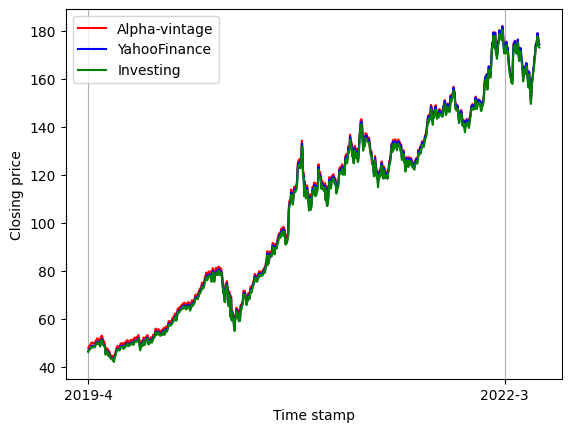

In [ ]:
draw_stocks(yahoofinance_stock, alphavintage_stock, inv_AAPL, 'AAPL')

759


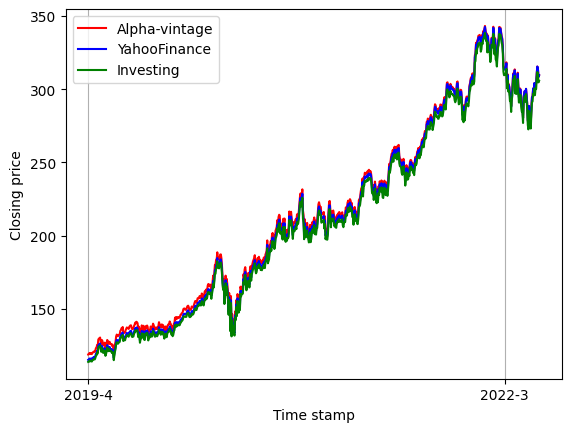

In [ ]:
draw_stocks(yahoofinance_stock, alphavintage_stock, inv_MSFT, 'MSFT')

In [ ]:
draw_stocks(yahoofinance_stock, alphavintage_stock, inv_NVDA, 'NVDA')

In [ ]:
draw_stocks(yahoofinance_stock, alphavintage_stock, inv_TSLA, 'TSLA')

In [ ]:
yahoofinance_stock['MSFT']

0      115.344635
1      115.509392
2      116.265312
3      115.674149
4      116.187767
          ...    
754    310.700012
755    315.410004
756    313.859985
757    308.309998
758    309.420013
Name: MSFT, Length: 759, dtype: float64

In [ ]:
alphavintage_stock['MSFT']

0      113.955601
1      114.118368
2      114.865178
3      114.281134
4      114.788582
          ...    
754    306.976306
755    311.629857
756    310.098434
757    304.614950
758    305.711646
Name: MSFT, Length: 759, dtype: float64

In [ ]:
def draw_stocks_two(x, y, sticker):
    x= x[sticker]; y = y[sticker];
    t = len(x)
    xis = np.arange(len(y))

    plt.xticks(np.arange(0, t, step=700), ['2019-4', '2022-3'])  # Set label locations.
    plt.ylabel('Closing price')  # Set label locations.
    plt.plot(xis, y, 'r',label='Alpha-vintage')
    plt.plot(xis, x, 'b', label='YahooFinance')
    plt.grid(axis = 'x')
    plt.xlabel('Time stamp')
    plt.legend()
    # plt.savefig((sticker+'.png'))

stickerunusual = [SPNS	ADI	QCOM	ESLT	OLED]

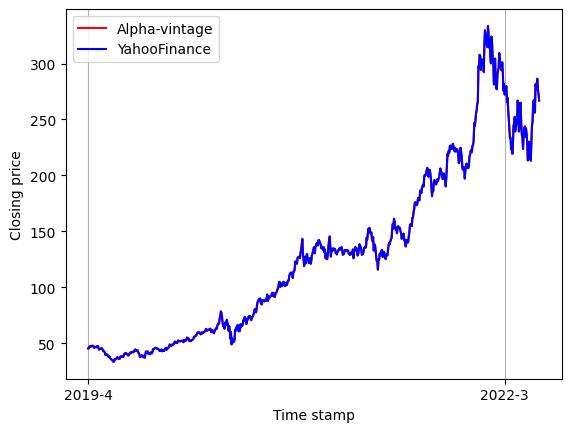

In [ ]:
draw_stocks_two(yahoofinance_stock, alphavintage_stock, 'NVDA')

In [ ]:
def draw_stocks_sub(x, y, z, sticker):
    x= x[sticker]; y = y[sticker];
    t = len(x)
    z = z['Price'][::-1]

    plt.subplot(121)

    xis = np.arange(len(y))
    print(len(xis))
    plt.xticks(np.arange(0, t, step=700), ['2019-4', '2022-3'])  # Set label locations.
    plt.ylabel('Closing price')  # Set label locations.
    plt.plot(xis, z, 'r',label='Alpha-vintage')
    plt.plot(xis, x, 'b', label='YahooFinance')
    plt.plot(xis, y, 'g',label='Investing')
    plt.grid(axis = 'x')
    plt.xlabel('Time stamp')
    # plt.legend()


    plt.subplot(122)
    x= x[300:500]; y = y[300:500];
    t = len(x)
    z = z[300:500]

    xis = np.arange(len(y))
    print(len(xis))
    plt.xticks(np.arange(0, t, step=100), ['2020-06', '2020-10'])  # Set label locations.
    # plt.ylabel('Closing price')  # Set label locations.
    plt.plot(xis, z, 'r',label='Alpha-vintage')
    plt.plot(xis, x, 'b', label='YahooFinance')
    plt.plot(xis, y, 'g',label='Investing')
    plt.grid(axis = 'x')
    plt.xlabel('Time stamp')
    plt.legend()
    plt.savefig((sticker+'.png'))

759
200


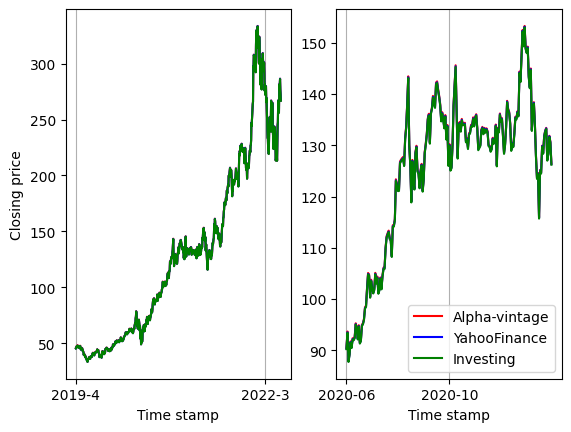

In [ ]:
draw_stocks_sub(yahoofinance_stock, alphavintage_stock, inv_NVDA, 'NVDA')

759
200


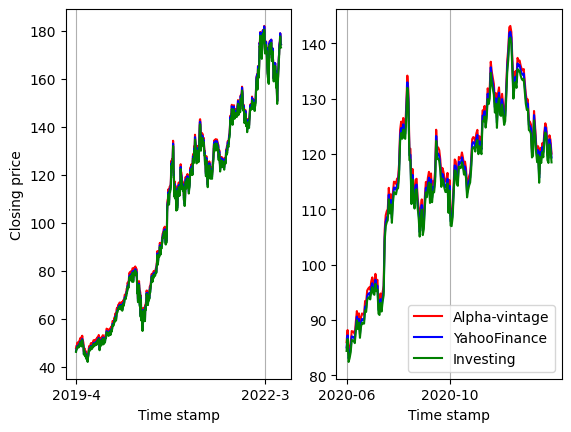

In [ ]:
draw_stocks_sub(yahoofinance_stock, alphavintage_stock,  inv_AAPL, 'AAPL')

759
200


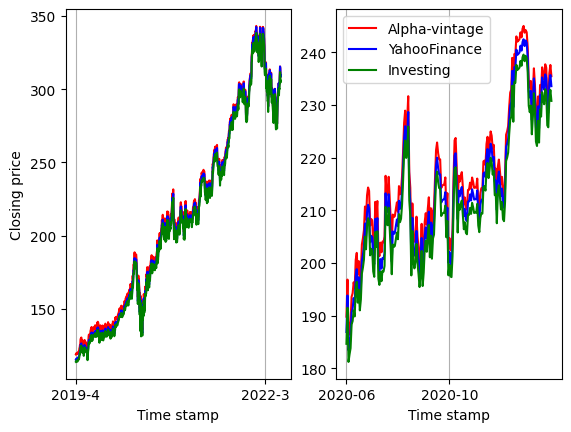

In [ ]:
draw_stocks_sub(yahoofinance_stock, alphavintage_stock, inv_MSFT, 'MSFT')

759
200


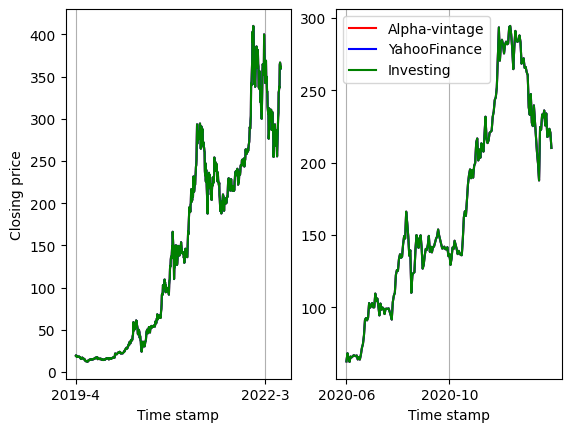

In [ ]:
draw_stocks_sub(yahoofinance_stock, alphavintage_stock, inv_TSLA, 'TSLA')

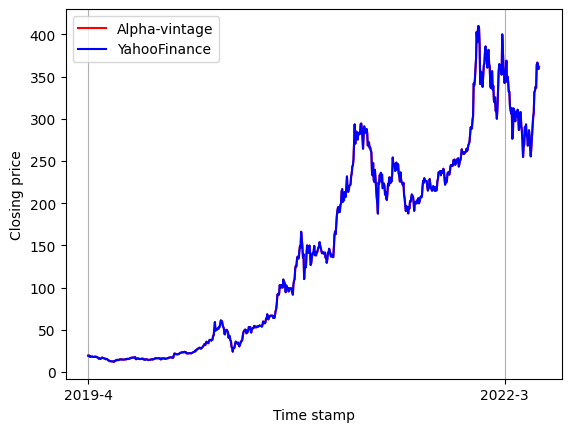

In [ ]:
draw_stocks_two(yahoofinance_stock, alphavintage_stock, 'TSLA')

In [ ]:
yatsla = pd.read_csv('yahoo_TSLA.csv')

In [ ]:
yahoofinance_stock['TSLA'] = yatsla['Adj Close'].copy()

In [ ]:
yatsla

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-01,18.841333,19.280001,18.752001,19.278667,19.278667,121656000
1,2019-04-02,19.219999,19.296000,18.925333,19.058666,19.058666,82183500
2,2019-04-03,19.154667,19.744667,19.144667,19.454000,19.454000,118791000
3,2019-04-04,17.459333,18.080000,17.372667,17.851999,17.851999,355810500
4,2019-04-05,17.990667,18.406668,17.740667,18.330667,18.330667,195574500
...,...,...,...,...,...,...,...
753,2022-03-25,336.000000,340.600006,332.440002,336.880005,336.880005,62031600
754,2022-03-28,355.033325,365.959991,351.200012,363.946655,363.946655,102506100
755,2022-03-29,369.329987,371.589996,357.703339,366.523346,366.523346,73614900
756,2022-03-30,363.723328,371.316681,361.333344,364.663330,364.663330,59865000


In [ ]:
alphavintage_stock.iloc[300]

In [ ]:
alphavintage_stock.iloc[500]

draw adjusted and raw

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
raw = pd.read_csv('/content/alphavintage_stock.csv')
new = pd.read_csv('/content/stocks_alphafinance.csv')

In [ ]:
raw = raw[::-1]

In [ ]:
new = new[::-1]

In [ ]:
raw.head(3)

,Unnamed: 0,Date,TSLA,NVDA,TAIT,INTC,AUDC,CSCO,MSFT,AAPL,...,CCMP,MGIC,LOGI,APWC,SWKS,SPNS,ADI,QCOM,ESLT,OLED
758,1078,2019-04-01,19.278667,45.270525,2.172503,48.183231,13.536097,47.985384,113.955601,46.205312,...,105.372576,7.611501,37.683795,2.31,77.680023,NaN,NaN,NaN,NaN,NaN
757,1077,2019-04-02,19.058667,45.449342,2.389754,48.050641,14.903955,48.255945,114.118368,46.876985,...,105.874485,7.593592,37.816819,2.30,77.957915,14.435235,99.712838,52.468370,128.246835,155.929842
756,1076,2019-04-03,19.454000,46.845108,2.405846,49.040647,14.770969,48.552690,114.865178,47.198325,...,106.878304,7.647320,38.358416,2.30,79.069482,14.332725,101.308464,52.098047,127.618361,161.306397


In [ ]:
new.head(3)

,Unnamed: 0,Date,QCOM,TSLA,NVDA,TAIT,INTC,AUDC,OLED,CSCO,...,WDC,ATVI,MKSI,TER,ADI,CCMP,MGIC,LOGI,APWC,SWKS
758,758,2019-04-01,57.81,289.18,182.28,2.70,54.51,14.25,158.36,54.98,...,49.31,47.12,94.43,41.78,108.28,115.26,8.50,39.66,2.31,83.86
757,757,2019-04-02,58.09,285.88,183.00,2.97,54.36,15.69,159.80,55.29,...,50.38,47.46,94.80,42.02,108.11,114.42,8.48,39.80,2.30,84.16
756,756,2019-04-03,57.68,291.81,188.62,2.99,55.48,15.55,165.31,55.63,...,52.01,47.65,98.57,43.60,109.84,119.38,8.54,40.37,2.30,85.36


In [ ]:
def draw_stocks_two(x, y, sticker):
    x= x[sticker]; y = y[sticker];
    t = len(x)
    xis = np.arange(len(y))

    plt.xticks(np.arange(0, t, step=700), ['2019-4', '2022-3'])  # Set label locations.
    plt.ylabel('Price')  # Set label locations.
    plt.plot(xis, x, 'r',label='Raw closing price')
    plt.plot(xis, y, 'b', label='Adjusted closing price')
    plt.grid(axis = 'x')
    plt.xlabel('Time stamp')
    plt.legend()
    plt.savefig((sticker+'-comp.png'))

In [ ]:
import matplotlib.pyplot as plt


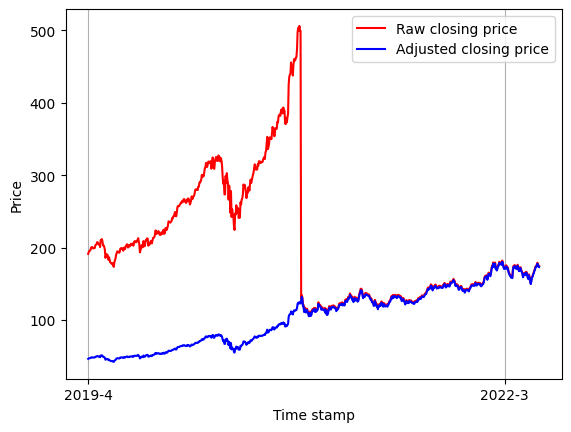

In [ ]:
draw_stocks_two(new, raw, 'AAPL')

In [ ]:
plt.savefig('aapl-com.png')

<Figure size 640x480 with 0 Axes>